# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('zillow_data.csv')

In [3]:
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


# Step 2: Data Preprocessing

In [4]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [5]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted#melted.groupby('time').aggregate({'value':'mean'})

In [6]:
df.drop(columns=['RegionID','SizeRank'], axis=1, inplace=True)

In [7]:
df_melted = melt_data(df)

In [8]:
df_texas = df_melted[df_melted['State']=='TX']

In [9]:
df_texas.set_index('time', inplace=True)

In [10]:
df_texas.index = pd.to_datetime(df_texas.index)

## Organize Travis County

In [11]:
df_harris = df_texas[df_texas['CountyName']=='Harris'].copy()

In [12]:
df_harris['RegionName'].nunique()

121

In [13]:
## Figure out how to make a dataframe that shows each RegionName 2/5/10 yr growth pct changes and then
## narrow it down. Narrow it down based on top short/mid/long term prospects and recovery speed/std/interest rate
## correlation

In [14]:
df_harris.drop(columns=['City', 'State', 'Metro', 'CountyName'], axis=1, inplace=True)

In [15]:
df_harris

,RegionName,value
time,,
1996-04-01,77494,210400.0
1996-04-01,77084,95000.0
1996-04-01,77449,95400.0
1996-04-01,77429,149600.0
1996-04-01,77036,120400.0
...,...,...
2018-04-01,77562,148400.0
2018-04-01,77032,119200.0
2018-04-01,77094,373900.0


In [16]:
harris_zips=list(df_harris['RegionName'].unique())

In [17]:
len(harris_zips)

121

In [46]:
harris_dict_full = {}
for zip_ in harris_zips:
    harris_dict_full[zip_] = df_harris[df_harris['RegionName']==zip_]

In [33]:
harris_dict_annual = {}
for zip_ in harris_zips:
    harris_dict_annual[zip_] = df_harris[df_harris['RegionName']==zip_].resample(rule='A').mean()
    harris_dict_annual[zip_]['year_2'] = harris_dict_annual[zip_]['value'].pct_change(periods=2)
    harris_dict_annual[zip_]['year_5'] = harris_dict_annual[zip_]['value'].pct_change(periods=5)
    harris_dict_annual[zip_]['year_10'] = harris_dict_annual[zip_]['value'].pct_change(periods=10)
    harris_dict_annual[zip_]['std'] = harris_dict_annual[zip_]['value'].std()

In [34]:
harris_dict_annual[77547].tail(2)

,RegionName,value,year_2,year_5,year_10,std
time,,,,,,
2017-12-31,77547,83766.666667,0.228400,0.321414,0.071185,12179.944151
2018-12-31,77547,81450.000000,0.008669,0.215218,0.097462,12179.944151


In [35]:
harris_comparison = {}
for zip_ in harris_zips:
    for zip_, vals in harris_dict_annual.items():
        harris_comparison[zip_] = harris_dict_annual[zip_].iloc[-1]   

In [36]:
df_harris_pct = pd.DataFrame(harris_comparison).T

In [37]:
df_harris_pct.drop(columns=['RegionName'], axis=1, inplace=True)

In [38]:
df_harris_pct.sort_values('year_2', ascending=False)

,value,year_2,year_5,year_10,std
77087,128050.0,0.364048,0.577456,0.391470,18023.531817
77021,121825.0,0.345761,0.671889,0.429032,17555.780514
77020,100500.0,0.300550,0.501868,0.413005,12807.817599
77016,98525.0,0.295813,0.510927,0.345510,13768.180076
77039,120600.0,0.275853,0.520328,0.263378,16677.544605
...,...,...,...,...,...
77096,364250.0,0.002086,0.289495,0.440862,49879.126698
77494,325250.0,-0.006365,0.232669,0.305569,39115.814995
77054,273675.0,-0.023113,0.244119,0.248565,28073.759730
77094,373425.0,-0.037234,0.234599,0.431341,49965.352986


In [25]:
# Formula for assessing growth rate ranking as follows: 40% - 2, 35% - 5, 25% - 10

In [40]:
df_harris_pct['total'] = df_harris_pct['year_2']*(0.4)+df_harris_pct['year_5']*(0.35)+df_harris_pct['year_10']*(0.25)

In [56]:
harris_top10 = list(df_harris_pct.sort_values(by='total', ascending=False).nlargest(columns='total',n=10).index)

<AxesSubplot:xlabel='time'>

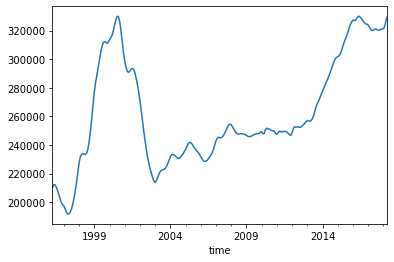

In [47]:
harris_dict_full[77494]['value'].plot()

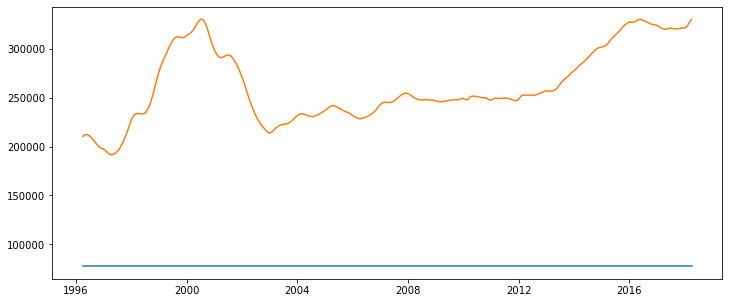

In [136]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(harris_dict_full[77494], label=code)

Housing prices seem very resiliant through 2008

In [58]:
harris_top10

[77092, 77021, 77043, 77080, 77087, 77530, 77020, 77016, 77506, 77074]

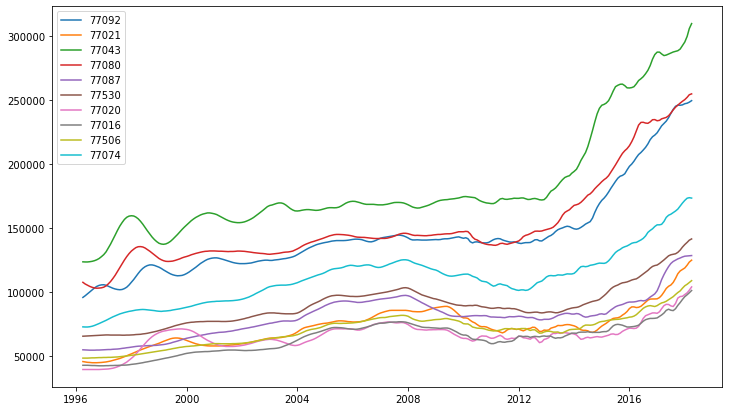

In [137]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,7))
for code in harris_top10:
    ax.plot(harris_dict_full[code]['value'], label=code)
    ax.legend()

- Measure how quick each zip recovered from tech boom
- Measure how quick each zip recovered from 08 bust

## Housing Bust Finder

Classifying dotcom bust as 1999 to June 2001

In [144]:
df_77092 = harris_dict_full[77092].copy()

In [160]:
print(df_77092['1999-01-01':'2001-06-01']['value'].idxmin())
df_77092['1999-01-01':'2001-06-01']['value'].min()

1999-09-01 00:00:00


112500.0

In [253]:
# min_val_idx =harris_dict_full[77021]['1999-01-01':'2001-01-01']['value'].idxmin()
min_value = harris_dict_full[77032]['1999-01-01':'2001-06-01']['value'].min()
min_value

63100.0

<AxesSubplot:xlabel='time'>

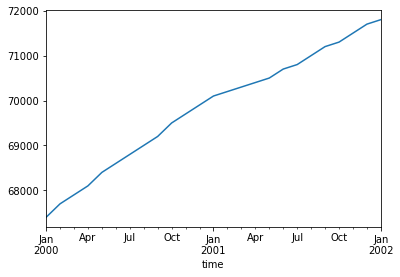

In [256]:
harris_dict_full[77032]['value']['2000-01-01':'2002-01-01'].plot()

In [190]:
min_value_after=(harris_dict_full[77021]['2001-06-01':]['value']>=min_value).idxmin()
min_value_after

Timestamp('2001-06-01 00:00:00')

In [199]:
# Took 212 days to recover
td = min_value_after-min_val_idx
td.days

212

Fix to match housing bust boom graph

In [374]:
harris_recover_dotcom = {}
for zip_ in harris_zips:
    for zip_, vals in harris_dict_full.items():
        idx_max_pre = harris_dict_full[zip_]['1999-01-01':'2001-06-01']['value'].idxmax()
        val_max_pre = harris_dict_full[zip_]['2000-01-01':'2001-06-01']['value'].max()
        idx_max_post=(harris_dict_full[zip_]['2001-07-01':]['value']>=val_max_pre).idxmax()
        td = idx_max_post - idx_max_pre
        days = td.days
        harris_recover_dotcom[zip_]=days

In [375]:
test=pd.Series(data=harris_recover_dotcom, index=harris_recover_dotcom.keys()).sort_values()

In [376]:
pd.DataFrame(test)

,0
77502,30
77074,30
77073,30
77034,30
77598,30
...,...
77054,2282
77008,2341
77018,4472
77003,4536


In [377]:
harris_recover_dotcom_counts={}
for k, v in harris_recover_dotcom.items():
    if v in harris_recover_dotcom_counts.keys():
        harris_recover_dotcom_counts[v] +=1
    else:
        harris_recover_dotcom_counts[v] = 1

In [378]:
dotcom_recovery = pd.Series(harris_recover_dotcom_counts).sort_values(ascending=False)

<AxesSubplot:>

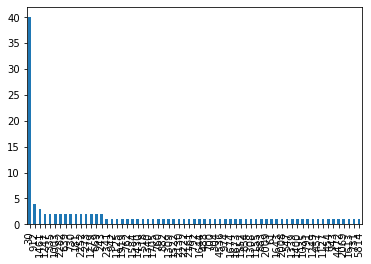

In [379]:
dotcom_recovery.plot(kind='bar')

In [383]:
harris_recover_housing = {}
for zip_ in harris_zips:
    for zip_, vals in harris_dict_full.items():
        idx_max_pre = harris_dict_full[zip_]['2005-01-01':'2008-12-31']['value'].idxmax()
        val_max_pre = harris_dict_full[zip_]['2005-01-01':'2008-12-31']['value'].max()
        idx_max_post=(harris_dict_full[zip_]['2008-12-30':]['value']>=val_max_pre).idxmax()
        td = idx_max_post - idx_max_pre
        days = td.days
        harris_recover_housing[zip_]=days

In [384]:
harris_recover_housing

{77494: 1797,
 77084: 2526,
 77449: 2526,
 77429: 2312,
 77036: 2496,
 77433: 2039,
 77077: 1155,
 77379: 2162,
 77095: 2100,
 77082: 2861,
 77057: 2435,
 77007: 2070,
 77521: 2708,
 77346: 2192,
 77070: 2373,
 77375: 2434,
 77373: 2738,
 77081: 1947,
 77063: 2557,
 77386: 1978,
 77042: 2069,
 77072: 3135,
 77015: 2983,
 77396: 3073,
 77008: 2039,
 77040: 2740,
 77089: 2739,
 77339: 2162,
 77088: 2952,
 77099: 2953,
 77090: 2677,
 77388: 2343,
 77024: 1978,
 77064: 2680,
 77004: 2983,
 77080: 670,
 77055: 1827,
 77044: 3134,
 77060: 3622,
 77338: 2769,
 77096: 640,
 77065: 2557,
 77035: 31,
 77054: 2070,
 77092: 2039,
 77074: 2738,
 77006: 31,
 77056: 2100,
 77520: 3135,
 77377: 2039,
 77571: 2677,
 77073: 2983,
 77079: 1613,
 77025: 1978,
 77034: 2922,
 77093: 3258,
 77019: 2223,
 77075: 3043,
 77598: 731,
 77536: 2557,
 77502: 2738,
 77018: 31,
 77532: 2527,
 77041: 2618,
 77014: 3074,
 77027: 701,
 77506: 3105,
 77493: 2101,
 77087: 3288,
 77021: 31,
 77049: 2708,
 77586: 2557,
 770

In [ ]:
# Verification of ^ Results

In [ ]:
# Look into correlation of results between two different bust cycles as % change values

<AxesSubplot:xlabel='time'>

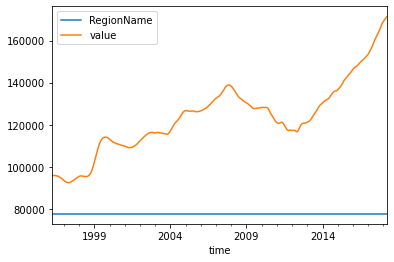

In [385]:
harris_dict_full[77521].plot()

In [364]:
idx_max_pre = harris_dict_full[77449]['2005-01-01':'2008-12-31']['value'].idxmax()
print(idx_max_pre)
val_max_pre = harris_dict_full[77449]['2005-01-01':'2008-12-31']['value'].max()
print(val_max_pre)
idx_max_post=(harris_dict_full[77449]['2008-12-31':]['value']>=val_max_pre).idxmax()
print(idx_max_post)
td = idx_max_post - idx_max_pre
print(td)
days = td.days
days

2007-11-01 00:00:00
137400.0
2014-10-01 00:00:00
2526 days 00:00:00


2526

In [361]:
(harris_dict_full[77449]['2008-12-31':]['value']>=137400.0).idxmax()

Timestamp('2014-10-01 00:00:00')

In [363]:
harris_dict_full[77449]['2013-12-31':'2015-12-31']

,RegionName,value
time,,
2014-01-01,77449,128300.0
2014-02-01,77449,129100.0
2014-03-01,77449,130000.0
2014-04-01,77449,131200.0
2014-05-01,77449,132500.0
2014-06-01,77449,133600.0
2014-07-01,77449,134500.0
2014-08-01,77449,135400.0
2014-09-01,77449,136500.0


In [331]:
housing_recover=pd.Series(harris_recover_housing).sort_values()

In [333]:
harris_recover_housing_counts={}
for k, v in harris_recover_housing.items():
    if v in harris_recover_housing_counts.keys():
        harris_recover_housing_counts[v] +=1
    else:
        harris_recover_housing_counts[v] = 1

In [335]:
harris_recover_housing_counts.plot(kind='kde')

AttributeError: 'dict' object has no attribute 'plot'

In [344]:
housing_recover=pd.Series(harris_recover_housing_counts).sort_values().T

In [345]:
housing_recover

1065     1
455      1
851      1
580      1
700      1
243      1
1461     1
731      1
245      1
214      1
915      2
1096     2
550      2
611      2
762      2
641      2
792      2
823      3
519      7
488      7
366     10
458     14
397     20
427     36
dtype: int64

In [348]:
housing_recover=pd.Series(housing_recover.index.values, index=housing_recover )

In [349]:
housing_recover

1     1065
1      455
1      851
1      580
1      700
1      243
1     1461
1      731
1      245
1      214
2      915
2     1096
2      550
2      611
2      762
2      641
2      792
3      823
7      519
7      488
10     366
14     458
20     397
36     427
dtype: int64

In [247]:
df_dotcom_recovery['value'].value_counts(1)

517 days    0.644628
151 days    0.231405
182 days    0.024793
486 days    0.024793
273 days    0.016529
365 days    0.008264
304 days    0.008264
335 days    0.008264
426 days    0.008264
457 days    0.008264
212 days    0.008264
243 days    0.008264
Name: value, dtype: float64

882 days in the difference between the beginning time and start time

In [218]:
df_77092['1999-01-01':'2001-06-01'].days

AttributeError: 'DataFrame' object has no attribute 'days'

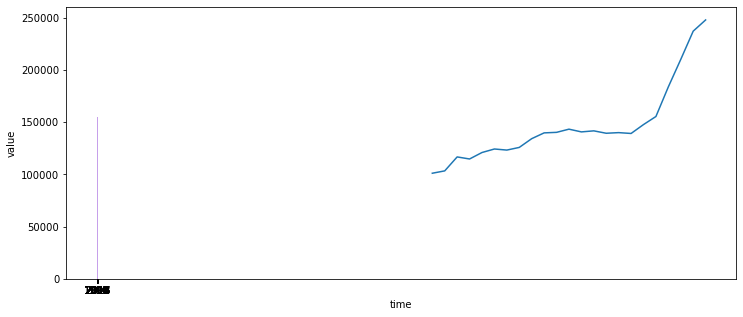

In [143]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(data=df_77092,x=df_77092.index.year, 
            y=df_77092['value'], ax=ax)
# ax1 = ax.twinx()
# sns.lineplot(data=df_77092, x=df_77092.index,
#              y=df_77092['value'],sort=False,ax=ax1)
ax.plot(df_77092['value'])
# sns.lineplot(data=harris_dict_annual[77092], x=harris_dict_annual[77092].index
#              y=harris_dict_annual[77092]['value'],sort=False,ax=ax1)

In [88]:
harris_dict_annual[77092].index

DatetimeIndex(['1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31',
               '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31'],
              dtype='datetime64[ns]', name='time', freq='A-DEC')

In [ ]:
harris_dict_annual[77547]['test'] = harris_dict_annual[77547]['value'].pct_change(periods=1)

In [ ]:
harris_dict_annual[77547]

In [ ]:
(393616.666667-268775.000000)/(268775.000000)

In [ ]:
df_78722['time'] = pd.to_datetime(df_78722['time'])

In [ ]:
df_78722.set_index('time', inplace=True)

In [ ]:
df_78722.columns

In [ ]:
df_78722.drop(columns=['RegionName', 'City', 'State', 'Metro', 'CountyName'], axis=1, inplace=True)

In [ ]:
df_78722['2012-01-01':].plot()

In [ ]:
df_78722['pct_change']=df_78722.pct_change(periods=1)

In [ ]:
df_78722

In [ ]:
df_yearly = df_78722.resample(rule='A').mean()

In [ ]:
df_yearly.drop('pct_change', axis=1, inplace=True)

In [ ]:
df_yearly.head(5)

In [ ]:
df_yearly.freq = 'Y'

In [ ]:
df_yearly['test'] = df_yearly.pct_change(periods=1)

In [ ]:
df_yearly.head(5)

In [ ]:
df_yearly['test']=df_yearly['test'].map(lambda x: x*100)

In [ ]:
df_yearly

In [ ]:
ax =df_yearly['test']['2010-01-01':].plot(figsize=(12,5))
from matplotlib import dates

# ax.xaxis.set_minor_locator(dates.MonthLocator())
# ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))
ax.xaxis.set_minor_locator(dates.MonthLocator())
# ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))
ax.xaxis.set_minor_formatter(dates.DateFormatter(fmt="%Q"))

In [ ]:
df_austinlong.columns

In [ ]:
df_austinlong['RegionName'].value_counts(1)

In [ ]:
regions = list(df_austinlong['RegionName'].values)

In [ ]:
df_austinlong.columns

In [ ]:
df_austinlong

In [ ]:
df_austinlong.index = pd.to_datetime(df_austinlong.index)

In [ ]:
df_austinlong.sort_index()

In [ ]:
some_dict = {}
for i in regions:
    some_dict[i] = df_austinlong[df_austinlong['RegionName']==i]

In [ ]:
some_dict.keys()

In [ ]:
for k, v in some_dict.items():
    some_dict[k].drop(columns=['RegionName', 'City', 'State', 'Metro', 'CountyName'], axis=1,inplace=True)
    some_dict[k].sort_index(inplace=True)

In [ ]:

plt.plot(some_dict[78746])
plt.plot(some_dict[78747])

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(some_dict[78746], label='78747')
ax.plot(some_dict[78747])
ax.legend()

In [ ]:
df_78722=df_austinlong.loc[df_austinlong['RegionName']==78722]

In [ ]:
df_78722 = df_78722.sort_index()

In [ ]:
df_78722.drop(columns='pct_change', axis=1, inplace=True)

In [ ]:
df_78722_annual =df_78722.resample('Y').mean()

In [ ]:
df_78722_annual['year_5'] = df_78722_annual.pct_change(periods=5)

In [ ]:
df_78722_annual['year_2'] = df_78722_annual['value'].pct_change(periods=2)

In [ ]:
df_78722_annual['year_10'] = df_78722_annual['value'].pct_change(periods=10)

In [ ]:
df_78722_annual.drop(columns='test', axis=1, inplace=True)

In [ ]:
df_78722_annual.iloc[-1:,:]

In [ ]:
some_dict[78702].drop('RegionName', axis=1, inplace=True)

In [ ]:
some_dict[78703].columns

# Step 3: EDA and Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [ ]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

# Step 5: ARIMA Modeling

# Step 6: Interpreting Results